# Applied Codes in Research

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# setting theme
import seaborn as sns
sns.set()

In [2]:
# loading the gathered cleaned data
data = data = pd.read_csv('Data/data.csv')

### Note  
#### The following column name meanings are listed below
<p>
    sex - sex of the respondents  <br>
    age - age of the respondents  <br>
    strand - the strand of the respondents in senior high  <br>
    fav_sns - favorite social media site or network of the resopndents  <br>
    n_sns - average number of hours spend in social media per day  <br>
    n_stud - average number of hours spend in studying per day  <br>
    gpa_1 - general average of the respondents from 1st grading  <br>
    gpa_2 - general average of the resopndents from 2st grading  <br>
    gpa_mean - the mean gpa of the respondents  <br>
    rate_1 - rate of how hard was the 1st semester of the respondents  <br>
    sns_use - Why do the respondents use social media  <br>
    int_acc - if the repsondents have unlimited internet access  <br>
<br>
<b>Perception of respondents in social media</b>  <br>
    p_mean - the mean perception of the students on social media  <br>
    p1 - it is efficient to use  <br>
    p2 - it gives me entertainment  <br>
    p3 - There are many driven communities that are able to share ideas and media.  <br>
    p4 - it gives me privacy  <br>
    p5 - it is user friendly  <br>
    p6 - it is easy to navigate  <br>
</p>

## Commmon social media sites that are used by the students for learning purposes

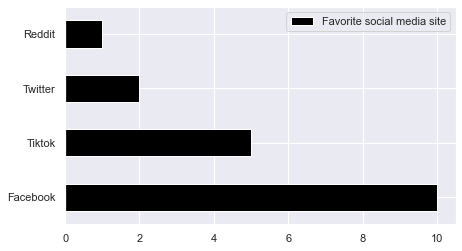

<Figure size 432x288 with 0 Axes>

In [3]:
df = data[data["sns_use"] == "For school purposes (group files and other document)"]

# figure size
fig = plt.figure(figsize=(7, 4))

# using horizontal barplot (barh)
ax = df["fav_sns"].value_counts().plot(kind="barh", color='black')

# figure customization
plt.legend(["Favorite social media site"])

# save figure
plt.savefig('plots/plot1.png')

# show figure
plt.show()

# clear figure memory
plt.clf()

## Perception of the Students to Social Media?

### General Description of Perception of the Students

In [4]:
df = data.loc[:, 'p1':'p6']
df.columns = ["Efficiency", 
              "Entertainment",
              "Community", 
              "Privacy", 
              "User Friendliness", 
              "Navigability"]
df = pd.DataFrame(df.describe())
df = df.drop(['count', 'std', 'min', 'max', '25%', '50%', '75%'])
df['Mean'] = data['p_mean'].mean()
df = df.round(2)
df.to_csv('data/p_mean.csv')
df

,Efficiency,Entertainment,Community,Privacy,User Friendliness,Navigability,Mean
mean,8.07,9.0,8.48,6.93,7.84,8.05,8.06


### Relation of the Perceptions of the students to their favorite social media site

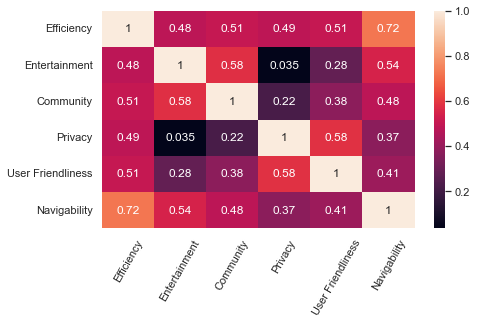

<Figure size 432x288 with 0 Axes>

In [5]:
df = data.loc[:, 'p1':'p6']
df.columns = ["Efficiency", 
              "Entertainment", 
              "Community", 
              "Privacy", 
              "User Friendliness", 
              "Navigability"]

# figure size
fig = plt.figure(figsize=(7, 4))

# figure customization
plt.xticks(rotation='60')

# using horizontal barplot (barh)
ax = sns.heatmap(df.corr(), annot=True)

# save figure
plt.savefig('plots/plot2.png', bbox_inches = 'tight')

# show figure
plt.show()

# clear figure memory
plt.clf()

## Perceived effects of social media to the students academic performance

<Figure size 720x360 with 0 Axes>

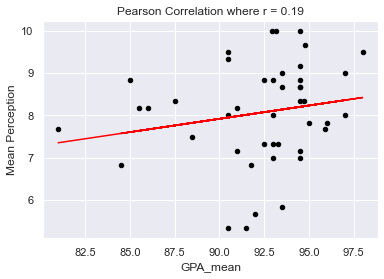

<Figure size 432x288 with 0 Axes>

In [6]:
df = data.loc[:, ['gpa_mean', 'p_mean']]

fig = plt.figure(figsize=(10,5))

# scatter plot
ax = df[["gpa_mean", "p_mean"]].plot(kind='scatter', 
                                     x='gpa_mean',
                                     y="p_mean", 
                                     color="black")

# line estimation
m, b = np.polyfit(df["gpa_mean"], df["p_mean"], 1)
ax.plot(df["gpa_mean"], m*df["gpa_mean"] + b, color='red')

# figure customization
plt.xlabel("GPA_mean")
plt.ylabel("Mean Perception")
plt.title("Pearson Correlation where r = 0.19")

# save figure
plt.savefig('plots/plot3.png', bbox_inches = 'tight')


plt.show()
plt.clf()

# Academic performance of the grade 12 students or their 1st and 2nd quarter

In [7]:
df = data.loc[:, ['gpa_1','gpa_2','gpa_mean', 'rate_1']]
df = df.describe()
df = df.drop(['count', 'std', 'min', 'max', '25%', '50%', '75%'])
df = df.round(2)
df.to_csv('data/data3.csv')
df

,gpa_1,gpa_2,gpa_mean,rate_1
mean,91.45,93.03,92.24,7.43


## Is there a significant relationship between social media and the academic performance of the students

<Figure size 720x576 with 0 Axes>

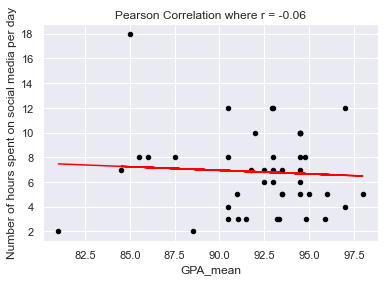

<Figure size 432x288 with 0 Axes>

In [8]:
df = data.loc[:, ['gpa_mean', 'n_sns']]

fig = plt.figure(figsize=(10,8))

# scatter plot
ax = df[["gpa_mean", "n_sns"]].plot(kind='scatter', 
                                    x='gpa_mean', 
                                    y="n_sns", 
                                    color="black")

# line estimation
m, b = np.polyfit(df["gpa_mean"], df["n_sns"], 1)
ax.plot(df["gpa_mean"], m*df["gpa_mean"] + b, color='red')

# figure customization
plt.xlabel("GPA_mean")
plt.ylabel("Number of hours spent on social media per day")
plt.title("Pearson Correlation where r = -0.06")

# save figure
plt.savefig('plots/plot4.png', bbox_inches = 'tight')


plt.show()
plt.clf()

In [9]:
df.corr()

,gpa_mean,n_sns
gpa_mean,1.000000,-0.061738
n_sns,-0.061738,1.000000
